In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


import warnings
warnings.filterwarnings("ignore")

import acquire as ac
import prepare as pr

# Question 1. 
Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

In [2]:
# acquire the data 
df = ac.get_titanic_data()
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [3]:
# prep and clean the data:
df = pr.clean_titanic_data(df)
train, val, test = pr.split_titanic_data(df)
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
583,0,1,male,36.0,0,0,40.1250,Cherbourg,1,1,0,0
165,1,3,male,9.0,0,2,20.5250,Southampton,0,1,0,1
50,0,3,male,7.0,4,1,39.6875,Southampton,0,1,0,1
259,1,2,female,50.0,0,1,26.0000,Southampton,0,0,0,1
306,1,1,female,NaN,0,0,110.8833,Cherbourg,1,0,0,0


In [4]:
train = train.drop(columns = 'sex')
train = train.drop(columns = 'embark_town')
train = train.drop(columns = 'age')
val = val.drop(columns = 'sex')
val = val.drop(columns = 'embark_town')
val = val.drop(columns = 'age')
test = test.drop(columns = 'sex')
test = test.drop(columns = 'embark_town')
test = test.drop(columns = 'age')

In [5]:
X_train = train.drop(columns=["survived"])
y_train = train.survived

X_val = val.drop(columns=["survived"])
y_val = val.survived

X_test = test.drop(columns=["survived"])
y_test = test.survived

In [6]:
X_train.head()

,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
583,1,0,0,40.1250,1,1,0,0
165,3,0,2,20.5250,0,1,0,1
50,3,4,1,39.6875,0,1,0,1
259,2,0,1,26.0000,0,0,0,1
306,1,0,0,110.8833,1,0,0,0


# Question 2.
Evaluate your results using the model score, confusion matrix, and classification report.


In [7]:
# The mode is a great baseline
baseline = y_train.mode()

# Produce a boolean array with True representing a match between the baseline prediction and reality
matches_baseline_prediction = y_train == 0

baseline_accuracy = matches_baseline_prediction.mean()
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")

Baseline accuracy: 0.62


In [8]:
# Make the model
forest1 = RandomForestClassifier(max_depth=1, random_state=123)

# Fit the model (on train and only train)
forest1.fit(X_train, y_train)

# Use the model
# We'll evaluate the model's performance on train, first
y_predictions = forest1.predict(X_train)

# Produce the classification report on the actual y values and this model's predicted y values
report = classification_report(y_train, y_predictions, output_dict=True)
print("Tree of 1 depth")
pd.DataFrame(report)

Tree of 1 depth


,0,1,accuracy,macro avg,weighted avg
precision,0.760814,0.923810,0.795181,0.842312,0.823329
recall,0.973941,0.507853,0.795181,0.740897,0.795181
f1-score,0.854286,0.655405,0.795181,0.754846,0.778008
support,307.000000,191.000000,0.795181,498.000000,498.000000


In [9]:
# sklearn confusion matrix
pd.DataFrame(confusion_matrix(y_predictions, y_train))

,0,1
0,299,94
1,8,97


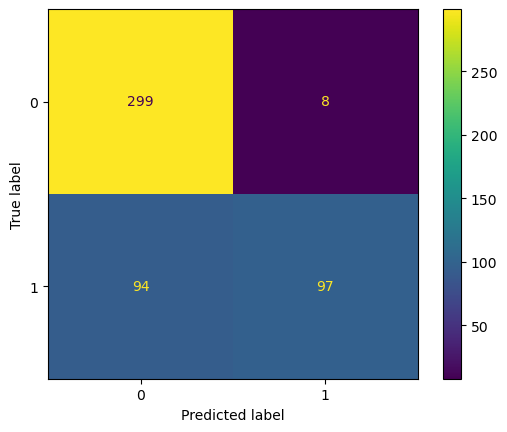

In [10]:
ConfusionMatrixDisplay.from_estimator(forest1, X_train, y_train);

In [11]:
TN, FP, FN, TP = confusion_matrix(y_train,y_predictions).ravel()
ALL = TP + TN + FP + FN

TP, TN, FP, FN

(97, 299, 8, 94)

# Question 3.
Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support

In [12]:
(109, 280, 27, 82)
accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 0.7951807228915663
True Positive Rate: 0.5078534031413613
False Positive Rate: 0.026058631921824105
True Negative Rate: 0.9739413680781759
False Negative Rate: 0.49214659685863876
Precision: 0.9238095238095239
Recall: 0.5078534031413613
F1 Score: 0.6554054054054055
Support (0): 191
Support (1): 307


# Question 4.
Run through steps 1-3 setting k to 10

In [13]:
for i in range(2, 11):
    # Make the model
    forest = RandomForestClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = forest.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()

Tree with max depth of 2
                    0           1  accuracy   macro avg  weighted avg
precision    0.774799    0.856000  0.795181    0.815399      0.805942
recall       0.941368    0.560209  0.795181    0.750789      0.795181
f1-score     0.850000    0.677215  0.795181    0.763608      0.783731
support    307.000000  191.000000  0.795181  498.000000    498.000000

Tree with max depth of 3
                    0           1  accuracy   macro avg  weighted avg
precision    0.813754    0.845638  0.823293    0.829696      0.825982
recall       0.925081    0.659686  0.823293    0.792384      0.823293
f1-score     0.865854    0.741176  0.823293    0.803515      0.818036
support    307.000000  191.000000  0.823293  498.000000    498.000000

Tree with max depth of 4
                    0           1  accuracy   macro avg  weighted avg
precision    0.815864    0.868966  0.831325    0.842415      0.836230
recall       0.938111    0.659686  0.831325    0.798898      0.831325
f1-score     

# Question 5. 
Run through steps 1-3 setting k to 20

In [14]:
metrics = []

for i in range(2, 25):
    # Make the model
    forest = RandomForestClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_val, y_val)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,2,0.795181,0.771028,0.024153
1,3,0.823293,0.775701,0.047592
2,4,0.831325,0.794393,0.036933
3,5,0.845382,0.813084,0.032297
4,6,0.895582,0.808411,0.087171
5,7,0.907631,0.794393,0.113238
6,8,0.919679,0.799065,0.120613
7,9,0.941767,0.789720,0.152047
8,10,0.943775,0.785047,0.158728
9,11,0.945783,0.775701,0.170082


# Question 6.
What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

# Question 7.
Which model performs best on our out-of-sample data from validate?